In [2]:
#import modules
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model

In [4]:
#model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import cross_val_score

In [5]:
#cross validation
from sklearn.cross_validation import train_test_split

C:\Users\emman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
#data
rawData = pd.read_csv('default updated.csv', header =0)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [8]:
del rawData['ID']

In [9]:
rawData['SEX'] = rawData.SEX.astype('category')

In [10]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1             

In [11]:
rawData['EDUCATION'] = rawData.EDUCATION.astype('category')
rawData['MARRIAGE'] = rawData.MARRIAGE.astype('category')
rawData['default payment next month'] = rawData['default payment next month'].astype('category')

In [12]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1       

In [13]:
#features
features = rawData.iloc[:,0:22]
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [14]:
#dependent variable
depVar = rawData['default payment next month']

In [15]:
#training set (feature space: x training)
X_train = (features[: 21000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [16]:
#dependent variable training set (y training)
Y_train = depVar[: 21000]
Y_train_count = len(Y_train.index)
print('The number of observations in the Y training set are:', str(Y_train_count))
Y_train.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [17]:
#Testing Set (X Testing)
X_test = features[-9000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
21000      30000   1         2        1   36      1     -1     -1     -1   
21001     280000   1         3        1   40      2      0      0      0   
21002     260000   1         2        1   37      0      0      0      0   
21003     200000   1         2        2   32      2      0      0      0   
21004      80000   1         2        2   32      2      0      0      0   

       PAY_5    ...     BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
21000      0    ...           780          0       1170        780          0   
21001      0    ...        184848     188411     191291     189029     192023   
21002      0    ...        118109      21557      23186      14117      15797   
21003     -2    ...        162743      81890          0          0          0   
21004      0    ...         65301      67253      67352      74448      729

In [18]:
#Ground Truth (y_test) 
y_test = depVar[-9000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [19]:
from sklearn.cross_validation import train_test_split

In [20]:
X_train, X_test, Y_train, y_test = train_test_split(X_train, Y_train)

In [21]:
X_train.shape, X_test.shape

((15750, 22), (5250, 22))

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
#Models
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression()

In [24]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       0
28       0
29       0
        ..
29970    0
29971    0
29972    0
29973    1
29974    1
29975    0
29976    1
29977    0
29978    0
29979    0
29980    0
29981    0
29982    1
29983    0
29984    0
29985    0
29986    0
29987    0
29988    0
29989    0
29990    0
29991    1
29992    0
29993    0
29994    1
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


In [25]:
modelSVC.fit(X_train, Y_train)
modelRF.fit(X_train, Y_train)
modelLR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
print(cross_val_score(modelSVC, X_train, Y_train)) 

[0.77032946 0.76838095 0.76986093]


In [41]:
#Support vector Classification

modelSVC.fit(X_train,Y_train)
print(cross_val_score(modelSVC, X_train, Y_train)) 
modelSVC.score(X_train,Y_train)

[0.77032946 0.76838095 0.76986093]


0.9942857142857143

In [27]:
modelSVC2 = SVC(degree = 4)
modelSVC2.fit(X_train,Y_train)
print(cross_val_score(modelSVC2, X_train, Y_train)) 
modelSVC2.score(X_train,Y_train)

[0.77161905 0.77238095 0.77219048]


0.993904761904762

In [26]:
modelSVC3 = SVC(C = 0.1)
modelSVC3.fit(X_train,Y_train)
print(cross_val_score(modelSVC3, X_train, Y_train)) 
modelSVC3.score(X_train,Y_train)

[0.77219048 0.77219048 0.77219048]


0.7721904761904762

In [33]:
#Random Forest Classification

modelRF.fit(X_train, Y_train)
print(cross_val_score(modelRF, X_train, Y_train))
modelRF.score(X_train, Y_train)

[0.79946677 0.79447619 0.79253191]


0.981015873015873

In [32]:
modelRF2 = RandomForestClassifier(n_estimators = 15)
modelRF2.fit(X_train, Y_train)
print(cross_val_score(modelRF2, X_train, Y_train))
modelRF2.score(X_train, Y_train)

[0.80019048 0.79961905 0.79561905]


0.9913650793650793

In [33]:
modelRF3 = RandomForestClassifier(criterion = "entropy")
modelRF3.fit(X_train, Y_train)
print(cross_val_score(modelRF3, X_train, Y_train))
modelRF3.score(X_train, Y_train)

[0.79333333 0.79752381 0.79619048]


0.9784126984126984

In [34]:
#Logistic Regression

modelLR.fit(X_train, Y_train)
print(cross_val_score(modelLR, X_train, Y_train)) 
modelLR.score(X_train, Y_train)

[0.76899638 0.7687619  0.76909888]


0.769079365079365

In [38]:
modelLR2 = LogisticRegression(C = 0.1)
modelLR2.fit(X_train, Y_train)
print(cross_val_score(modelLR2, X_train, Y_train)) 
modelLR2.score(X_train, Y_train)

[0.77180952 0.77219048 0.772     ]


0.7720634920634921

In [39]:
modelLR3 = LogisticRegression(solver = "sag")
modelLR3.fit(X_train, Y_train)
print(cross_val_score(modelLR3, X_train, Y_train)) 
modelLR3.score(X_train, Y_train)

C:\Users\emman\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\emman\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\emman\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0.77180952 0.772      0.772     ]


C:\Users\emman\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7720634920634921

In [35]:
predictions = modelSVC.predict(X_test)

In [36]:
predAccuracy = accuracy_score(y_test,predictions)

In [37]:
predKappa = cohen_kappa_score(y_test,predictions)

In [38]:
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.779
Kappa: 0.017


In [28]:
predictions = modelSVC2.predict(X_test)
predAccuracy = accuracy_score(y_test,predictions)
predKappa = cohen_kappa_score(y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.771
Kappa: 0.014


In [29]:
predictions = modelSVC3.predict(X_test)
predAccuracy = accuracy_score(y_test,predictions)
predKappa = cohen_kappa_score(y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.770
Kappa: 0.000


In [30]:
predictions = modelRF.predict(X_test)
predAccuracy = accuracy_score(y_test,predictions)
predKappa = cohen_kappa_score(y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.798
Kappa: 0.314


In [34]:
predictions = modelRF2.predict(X_test)
predAccuracy = accuracy_score(y_test,predictions)
predKappa = cohen_kappa_score(y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.803
Kappa: 0.358


In [35]:
predictions = modelRF3.predict(X_test)
predAccuracy = accuracy_score(y_test,predictions)
predKappa = cohen_kappa_score(y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.801
Kappa: 0.326


In [36]:
predictions = modelLR.predict(X_test)
predAccuracy = accuracy_score(y_test,predictions)
predKappa = cohen_kappa_score(y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.770
Kappa: -0.000


In [40]:
predictions = modelLR2.predict(X_test)
predAccuracy = accuracy_score(y_test,predictions)
predKappa = cohen_kappa_score(y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.770
Kappa: -0.000


In [41]:
predictions = modelLR3.predict(X_test)
predAccuracy = accuracy_score(y_test,predictions)
predKappa = cohen_kappa_score(y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print('Kappa: %.3f' % predKappa)

Accuracy: 0.770
Kappa: 0.002


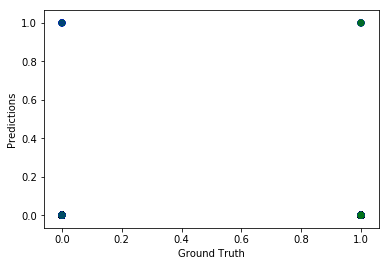

In [39]:
#Plotting the results, plot known values vs predictions

plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();